# The Beeradvocate project
## Dorota Gawrońska-Popa

### Description
This dataset consists of beer reviews from Beeradvocate. 
The data span a period of more than 10 years, including all ~1.5 million reviews up to November 2011. 
Each review includes ratings in terms of five "aspects": **appearance, aroma, palate, taste, and overall impression**. 

Reviews include product and user information, followed by each of these five ratings, and a plaintext review. 
We also have reviews from ratebeer.

### Assignment
We know that there are hundreds of possible approaches to the proposed cases and that there is no a best solution. What is important for us is to assess your technical proficiency. Presenting your results, discussing rationale behind your approach to solving those problems and as well alternative approaches is a part of an interview, which is the next stage of this recruitment (only chosen candidates will be invited).

Taking the following dataset: https://data.world/socialmediadata/beeradvocate

Could you provide an answer for the following **questions**:

1. Which brewery produces the strongest beers by abv ?
2. If you had to pick 3 beers to recommend to someone, how would you approach the problem ?
3. What are the factors that impacts the quality of beer the most ?
4. I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

### Attribute Information:

Input variables:
- brewery_id 
- brewery_name
- review_time
- review_aroma
- review_appearance
- review_profilename
- beer_style
- review_palate
- review_taste
- beer_name
- beer_abv (ABV, or alcohol by volume, is the standard measurement, used worldwide, to assess the strength of a particular beer)
- beer_beerid

Target
- review_overall 

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
import plotly.express as px
import chart_studio.plotly as py

import datetime
from datetime import date

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 20
pd.options.display.max_rows = 50

## Data preprocessing
### Load Dataset

In [2]:
df = pd.read_csv('/Users/dorotagawronska-popa/PycharmProjects/Large_files/beer_reviews.csv')
df.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [3]:
df.tail()

brewery_id                 brewery_name  review_time  review_overall  \
1586609       14359  The Defiant Brewing Company   1162684892             5.0   
1586610       14359  The Defiant Brewing Company   1161048566             4.0   
1586611       14359  The Defiant Brewing Company   1160702513             4.5   
1586612       14359  The Defiant Brewing Company   1160023044             4.0   
1586613       14359  The Defiant Brewing Company   1160005319             5.0   

         review_aroma  review_appearance review_profilename   beer_style  \
1586609           4.0                3.5         maddogruss  Pumpkin Ale   
1586610           5.0                2.5          yelterdow  Pumpkin Ale   
1586611           3.5                3.0           TongoRad  Pumpkin Ale   
1586612           4.5                4.5           dherling  Pumpkin Ale   
1586613           4.5                4.5               cbl2  Pumpkin Ale   

         review_palate  review_taste           beer_name  beer_abv  \
1586609            4.0           4.0  The Horseman's Ale       5.2   
1586610            2.0           4.0  The Horseman's Ale       5.2   
1586611            3.5           4.0  The Horseman's Ale       5.2   
1586612            4.5           4.5  The Horseman's Ale       5.2   
1586613            4.5           4.5  The Horseman's Ale       5.2   

         beer_beerid  
1586609        33061  
1586610        33061  
1586611        33061  
1586612        33061  
1586613        33061

In [4]:
print("\n Shape of dataset: \n")
df.shape


 Shape of dataset: 



(1586614, 13)

In [5]:
print("\n Information of the columns: \n")
df.info()
# In dataset there are some numerical and some categorical values


 Information of the columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
print("\n list of columns in dataset: \n")
df.columns


 list of columns in dataset: 



Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
print("Number of unique breweries, by id: " , df.brewery_id.nunique())
print("Number of unique breweries, by name: " , df.brewery_name.nunique())
print("Number of unique beers, by id: " , df.beer_beerid.nunique())
print("Number of unique beers, by name: " , df.beer_name.nunique())
print("Number of unique users, by profilename: " , df.review_profilename.nunique())
print("Number of unique styles: " , df.beer_style.nunique())
print("Number of unique aroma: " , df.review_aroma.nunique())
print("Number of unique appearance: " , df.review_appearance.nunique())
print("Number of unique palate: " , df.review_palate.nunique())
print("Number of unique taste: " , df.review_taste.nunique())
print("Number of unique abv: " , df.beer_abv.nunique())

Number of unique breweries, by id:  5840
Number of unique breweries, by name:  5742
Number of unique beers, by id:  66055
Number of unique beers, by name:  56857
Number of unique users, by profilename:  33387
Number of unique styles:  104
Number of unique aroma:  9
Number of unique appearance:  10
Number of unique palate:  9
Number of unique taste:  9
Number of unique abv:  530


### Value Analysis
#### Below, I will analyze the data in terms of: 
- missing values, 
- outliers data, 
- duplicate rows,
- unnecessary columns,
- date column correction.

### Missing Values

In [8]:
print("\n Number of missing values: \n")
df.isna().sum()


 Number of missing values: 



brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing_df = pd.concat([total, percent], axis=1, keys=["Total", "Percent %"])
missing_df.head(25)

Total  Percent %
beer_abv            67785   4.272306
review_profilename    348   0.021934
brewery_name           15   0.000945
beer_beerid             0   0.000000
beer_name               0   0.000000
review_taste            0   0.000000
review_palate           0   0.000000
beer_style              0   0.000000
review_appearance       0   0.000000
review_aroma            0   0.000000
review_overall          0   0.000000
review_time             0   0.000000
brewery_id              0   0.000000

In [10]:
df.dropna(subset=['brewery_name','review_profilename'], inplace=True)

In [11]:
round(df.beer_abv.describe(),2)

count    1518478.00
mean           7.04
std            2.32
min            0.01
25%            5.20
50%            6.50
75%            8.50
max           57.70
Name: beer_abv, dtype: float64

<AxesSubplot:>

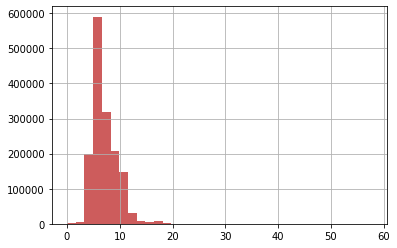

In [12]:
df.beer_abv.hist(bins=35, color='indianred')

In [13]:
df['beer_abv']= df['beer_abv'].fillna(df['beer_abv'].mode()[0])

In [14]:
print("\n Number of missing values after cleaning: \n")
df.isna().sum()


 Number of missing values after cleaning: 



brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

### Outliers data

In [15]:
round(df.describe(),2)

brewery_id   review_time  review_overall  review_aroma  \
count  1586251.00  1.586251e+06      1586251.00    1586251.00   
mean      3130.38  1.224100e+09            3.82          3.74   
std       5578.48  7.654413e+07            0.72          0.70   
min          1.00  8.406720e+08            0.00          1.00   
25%        143.00  1.173236e+09            3.50          3.50   
50%        429.00  1.239222e+09            4.00          4.00   
75%       2372.00  1.288572e+09            4.50          4.00   
max      28003.00  1.326285e+09            5.00          5.00   

       review_appearance  review_palate  review_taste    beer_abv  beer_beerid  
count         1586251.00     1586251.00    1586251.00  1586251.00   1586251.00  
mean                3.84           3.74          3.79        6.96     21714.68  
std                 0.62           0.68          0.73        2.31     21819.01  
min                 0.00           1.00          1.00        0.01         3.00  
25%                 3.50           3.50          3.50        5.10      1717.00  
50%                 4.00           4.00          4.00        6.30     13906.00  
75%                 4.00           4.00          4.50        8.40     39441.00  
max                 5.00           5.00          5.00       57.70     77317.00

I was thinking, if someone produce beer with 57,7 ABV. Yes. Exactly yes. I have checked on this website: 

**50 strongest beers in the world**
https://www.ratebeer.com/Ratings/TopAlcohol.asp

In [16]:
print("\n Selected beers stronger than 40% abv: \n")

df[df['beer_abv'] > 40.0].sort_values(by='beer_abv', ascending=False)[['brewery_name','beer_name','beer_abv']]


 Selected beers stronger than 40% abv: 



brewery_name                      beer_name  beer_abv
12919   Schorschbräu  Schorschbräu Schorschbock 57%      57.7
12940   Schorschbräu  Schorschbräu Schorschbock 43%      43.0
12939   Schorschbräu  Schorschbräu Schorschbock 43%      43.0
746418       BrewDog             Sink The Bismarck!      41.0
746397       BrewDog             Sink The Bismarck!      41.0
...              ...                            ...       ...
746363       BrewDog             Sink The Bismarck!      41.0
746362       BrewDog             Sink The Bismarck!      41.0
746361       BrewDog             Sink The Bismarck!      41.0
746360       BrewDog             Sink The Bismarck!      41.0
746419       BrewDog             Sink The Bismarck!      41.0

[79 rows x 3 columns]

To sum up, I will not remove outliers from 'beer_abv' column, because it would seem that there are outliers, but they turned out to be real.

#### How to Review a Beer
"First, let's start with the core beer rating system. Inspired by several professional beer judging scoring systems, a user's beer rating is comprised of five ratable attributes. Each is given a point value on a 1–5 point scale with 0.25 increments, and then **the final user rating is calculated using our weighted rating system, wherein certain attributes are applied with more importance.**"

source: https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/

In [17]:
print("\n Selected items with bad review: \n")

bad_review = df[(df.review_appearance < 1) | (df.review_overall < 1)]
bad_review


 Selected items with bad review: 



brewery_id              brewery_name  review_time  review_overall  \
37234         1413       Desert Edge Brewery   1030197670             0.0   
39648         1413       Desert Edge Brewery   1030267158             0.0   
39667         1413       Desert Edge Brewery   1030266889             0.0   
653695        1412  Red Rock Brewing Company   1030007859             0.0   
653706        1412  Red Rock Brewing Company   1030008142             0.0   
653726        1412  Red Rock Brewing Company   1030007737             0.0   
653740        1412  Red Rock Brewing Company   1030008039             0.0   

        review_aroma  review_appearance review_profilename  \
37234            2.0                0.0           beernut7   
39648            4.0                0.0           beernut7   
39667            3.0                0.0           beernut7   
653695           2.0                0.0           beernut7   
653706           3.0                0.0           beernut7   
653726           2.0                0.0           beernut7   
653740           2.0                0.0           beernut7   

                      beer_style  review_palate  review_taste  \
37234             Czech Pilsener            3.0           2.0   
39648            Irish Dry Stout            2.0           2.0   
39667    American Pale Ale (APA)            2.0           2.0   
653695                Hefeweizen            2.5           2.0   
653706  American Amber / Red Ale            2.5           3.5   
653726           German Pilsener            3.0           1.5   
653740              Dunkelweizen            2.5           2.0   

                      beer_name  beer_abv  beer_beerid  
37234                  Pub Pils       4.0         3806  
39648         Latter Days Stout       4.0         3804  
39667             Utah Pale Ale       4.0         3810  
653695  Red Rock Bavarian Weiss       4.0         3788  
653706       Red Rock Amber Ale       4.0         3787  
653726         Red Rock Pilsner       4.0         3822  
653740   Red Rock Dunkel Weizen       4.0         3786

Above is a list of seven reviews with ratings less than 1. They are all from the same customer 'beernut7'. I will delete these rows.

In [18]:
bad_review = bad_review.index.values
bad_review

array([ 37234,  39648,  39667, 653695, 653706, 653726, 653740])

In [19]:
df.drop(bad_review, axis=0, inplace=True)
df.sample(1)

brewery_id             brewery_name  review_time  review_overall  \
1541892         345  Victory Brewing Company   1261025506             3.5   

         review_aroma  review_appearance review_profilename beer_style  \
1541892           3.5                3.0          babaracas     Tripel   

         review_palate  review_taste      beer_name  beer_abv  beer_beerid  
1541892            4.0           4.0  Golden Monkey       9.5         1003

### Duplicate data

In [20]:
duplicatedAll = df[df.duplicated()]
print("\n List of duplicated rows by all conditions:\n", duplicatedAll)


 List of duplicated rows by all conditions:
 Empty DataFrame
Columns: [brewery_id, brewery_name, review_time, review_overall, review_aroma, review_appearance, review_profilename, beer_style, review_palate, review_taste, beer_name, beer_abv, beer_beerid]
Index: []


In [21]:
duplicated = df[df.duplicated(subset= ['review_profilename','brewery_name','beer_name'], keep='first')]

print("\n All duplicated reviews by brewery name, beer name and profilename: \n", duplicated)


 All duplicated reviews by brewery name, beer name and profilename: 
          brewery_id                          brewery_name  review_time  \
199            1075               Caldera Brewing Company   1277173621   
426            1075               Caldera Brewing Company   1277173332   
862            1075               Caldera Brewing Company   1267834574   
885            1075               Caldera Brewing Company   1248991175   
1348            163                Amstel Brouwerij B. V.   1048178512   
...             ...                                   ...          ...   
1585753        3835                   Drake's Brewing Co.   1285811162   
1585815        3835                   Drake's Brewing Co.   1153800298   
1586027        3835                   Drake's Brewing Co.   1218181284   
1586095        1854  Hereford & Hops Restaurant & Brewpub   1178252809   
1586581       14359           The Defiant Brewing Company   1206208306   

         review_overall  review_aroma  r

In [22]:
print("\n Duplicate Rows except first occurrence based on profilename, brewery name and beer name:\n", round((14933)/ 1586613 * 100, 2),"%")



 Duplicate Rows except first occurrence based on profilename, brewery name and beer name:
 0.94 %


In [23]:
df.drop_duplicates(subset= ['review_profilename','brewery_name','beer_name'], keep='first', inplace = True)

### Unnecessary columns
I will remove the columns that do not affect the customer rating.

In [24]:
df.drop(['brewery_id', 'beer_beerid'], axis=1, inplace=True)

### Adjustment of date variables

In [25]:
df['review_time'] = pd.to_datetime (df['review_time'], unit='s').dt.date
df['review_time']

0          2009-02-16
1          2009-03-01
2          2009-03-01
3          2009-02-15
4          2010-12-30
              ...    
1586609    2006-11-05
1586610    2006-10-17
1586611    2006-10-13
1586612    2006-10-05
1586613    2006-10-04
Name: review_time, Length: 1571311, dtype: object

In [26]:
print("\n Information of the columns: \n")
df.info()


 Information of the columns: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571311 entries, 0 to 1586613
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1571311 non-null  object 
 1   review_time         1571311 non-null  object 
 2   review_overall      1571311 non-null  float64
 3   review_aroma        1571311 non-null  float64
 4   review_appearance   1571311 non-null  float64
 5   review_profilename  1571311 non-null  object 
 6   beer_style          1571311 non-null  object 
 7   review_palate       1571311 non-null  float64
 8   review_taste        1571311 non-null  float64
 9   beer_name           1571311 non-null  object 
 10  beer_abv            1571311 non-null  float64
dtypes: float64(6), object(5)
memory usage: 143.9+ MB


### EDA Data Exploration 

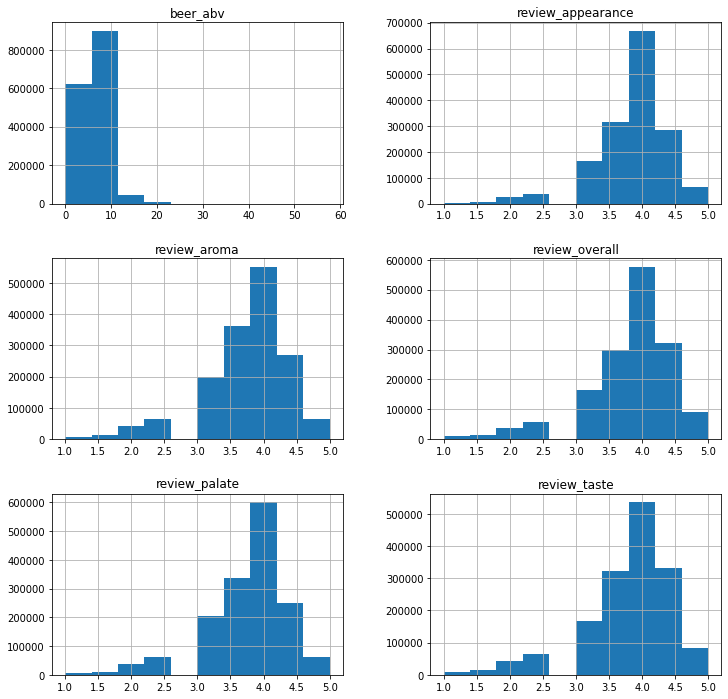

In [27]:
df.hist(figsize=(12,12))
plt.show()

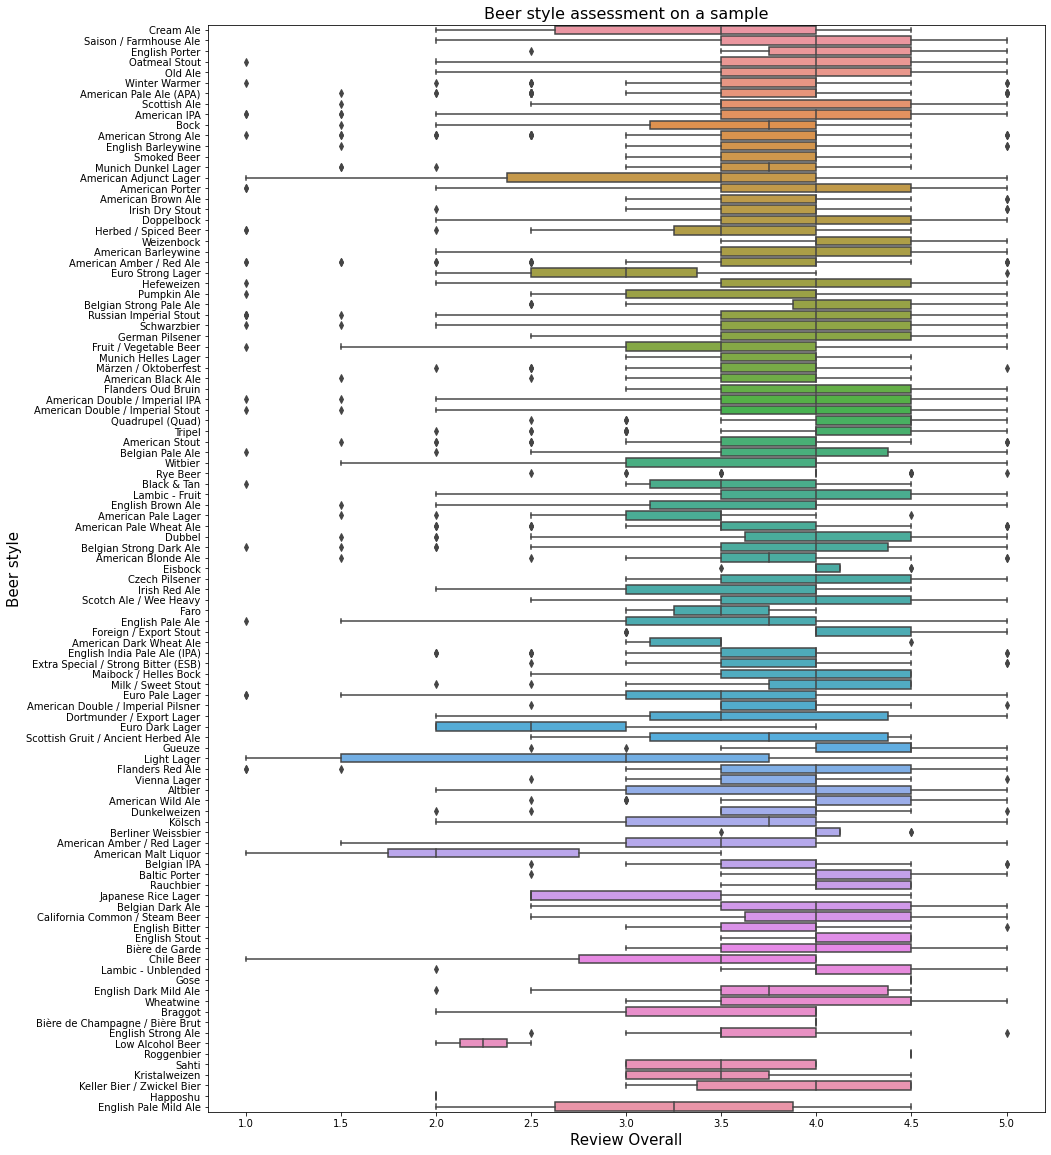

In [28]:
df_sample = df.sample(5000)

plt.figure(figsize=(15, 20))
ax = sns.boxplot(y="beer_style", x="review_overall", data=df_sample)
ax = plt.ylabel('Beer style',fontsize=15)
ax = plt.xlabel('Review Overall', fontsize=15)
ax = plt.title('Beer style assessment on a sample', fontsize = 16)
plt.show()

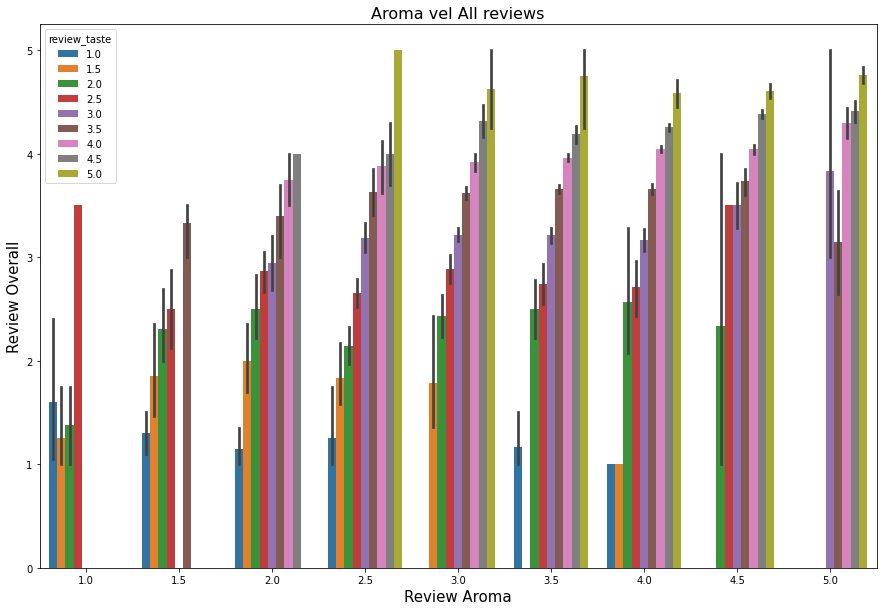

In [29]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x="review_aroma", y="review_overall",  hue="review_taste", data=df_sample)
ax = plt.title('Aroma vel All reviews', fontsize = 16)
ax = plt.xlabel('Review Aroma', fontsize = 15)
ax = plt.ylabel('Review Overall', fontsize = 15)
plt.show()

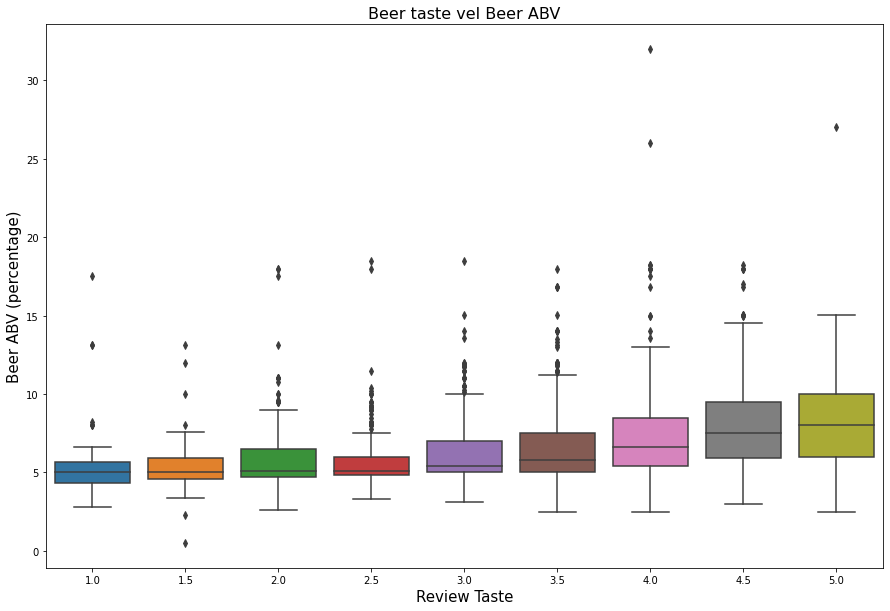

In [30]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="review_taste", y="beer_abv", data=df_sample)
ax = plt.ylabel('Beer ABV (percentage)',fontsize=15)
ax = plt.xlabel('Review Taste', fontsize=15)
ax = plt.title('Beer taste vel Beer ABV', fontsize = 16)
plt.show()

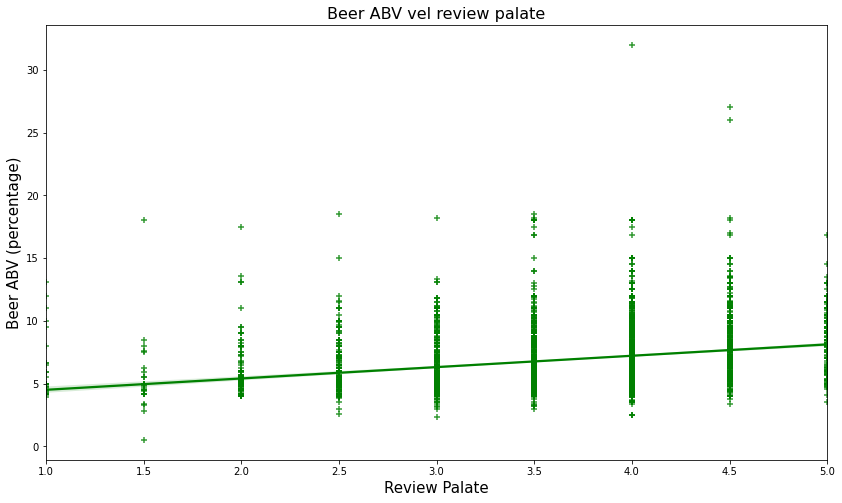

In [31]:
plt.figure(figsize = (14,8))
sns.regplot(y="beer_abv", x="review_palate", marker="+", data=df_sample, color="g")
plt.xlabel('Review Palate',fontsize=15)
plt.ylabel('Beer ABV (percentage)',fontsize=15)
plt.title('Beer ABV vel review palate', fontsize=16)
plt.show()

## Questions:

### Question 1. 

### Which brewery produces the strongest beers by abv ?

In [32]:
top_brewery_abv = df[['brewery_name','beer_name','beer_abv']].\
        sort_values('beer_abv', ascending=False).\
        drop_duplicates('beer_name').head(10)
top_brewery_abv

brewery_name  \
12919                                         Schorschbräu   
12940                                         Schorschbräu   
746370                                             BrewDog   
12934                                         Schorschbräu   
996153                                 De Struise Brouwers   
748422                                             BrewDog   
12918                                         Schorschbräu   
1042327  Hair of the Dog Brewing Company / Brewery and ...   
746422                                             BrewDog   
293935                  Boston Beer Company (Samuel Adams)   

                             beer_name  beer_abv  
12919    Schorschbräu Schorschbock 57%     57.70  
12940    Schorschbräu Schorschbock 43%     43.00  
746370              Sink The Bismarck!     41.00  
12934    Schorschbräu Schorschbock 40%     39.44  
996153      Black Damnation VI - Messy     39.00  
748422        Tactical Nuclear Penguin     32.00  
12918    Schorschbräu Schorschbock 31%     30.86  
1042327                           Dave     29.00  
746422                      Ghost Deer     28.00  
293935            Samuel Adams Utopias     27.00

In [33]:
top_brewery_abv = top_brewery_abv.sort_values('beer_abv', ascending=True)

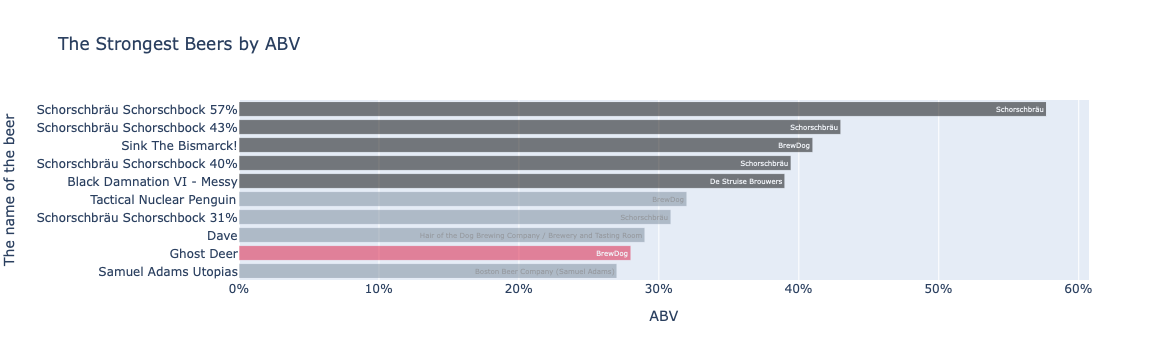

The strongest beer called Schorschbräu Schorschbock 57% is produced by the Schorschbräu Brewery


In [34]:
colors = ['lightslategray',] * 5
colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=top_brewery_abv['beer_abv']/100,
    y=top_brewery_abv['beer_name'],
    text=top_brewery_abv['brewery_name'],
    textposition = 'inside',
    orientation = 'h',
    marker_color=colors,
    opacity=0.5
)])
fig.update_layout(title_text='The Strongest Beers by ABV',
                  xaxis=dict(title="ABV",
                              tickformat = "%",
                              hoverformat = '.2%'),
                  yaxis=dict(title="The name of the beer")
                 )
fig.show()

print('The strongest beer called Schorschbräu Schorschbock 57% is produced by the Schorschbräu Brewery')

### Question 2. 

### If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

Note that there are over 66,000 beers from nearly 6,000 breweries in over 100 flavors (styles). We rely on over 33,000 unique opinions.

I assume this is a person who does not drink beer or hardly ever drinks, therefore he needs my recommendation. 
1. In the first step, I chose beers that have the most recommendations, and
2. secondly, they have the highest ratings. 
This gives me the answer which beers are often bought (i.e. rated) and have a good reputation. 

**To do later on:** 

3. In the third step, I would divide these beers by style, so that a person could try different types of beer. 
4. Depending on the results, I will try to choose beers from different breweries.

#### I. First method

In [35]:
top_beer_review = df[['brewery_name','beer_name','review_overall','beer_style']].\
        sort_values('review_overall', ascending=False)
top_beer_review.head(10)

brewery_name  \
1586613   The Defiant Brewing Company   
513223   Karl Strauss Brewing Company   
970208    Brouwerij Duvel Moortgat NV   
1434139            Portsmouth Brewery   
140115             Cigar City Brewing   
970205    Brouwerij Duvel Moortgat NV   
970204    Brouwerij Duvel Moortgat NV   
1434141            Portsmouth Brewery   
970200    Brouwerij Duvel Moortgat NV   
970196    Brouwerij Duvel Moortgat NV   

                                                 beer_name  review_overall  \
1586613                                 The Horseman's Ale             5.0   
513223   Karl Strauss Parrot In A Palm Tree Holiday Bal...             5.0   
970208                                               Duvel             5.0   
1434139                           Portsmouth Oatmeal Stout             5.0   
140115                                  Guava Grove Saison             5.0   
970205                                               Duvel             5.0   
970204                                               Duvel             5.0   
1434141                           Portsmouth Oatmeal Stout             5.0   
970200                                               Duvel             5.0   
970196                                               Duvel             5.0   

                      beer_style  
1586613              Pumpkin Ale  
513223             Baltic Porter  
970208   Belgian Strong Pale Ale  
1434139            Oatmeal Stout  
140115    Saison / Farmhouse Ale  
970205   Belgian Strong Pale Ale  
970204   Belgian Strong Pale Ale  
1434141            Oatmeal Stout  
970200   Belgian Strong Pale Ale  
970196   Belgian Strong Pale Ale

In [36]:
top_beer_review = top_beer_review.groupby(['beer_name']).agg(['count','mean','median'])
top_beer_review

review_overall                 
                                          count      mean median
beer_name                                                       
! (Old Ale)                                   1  4.000000   4.00
"100"                                         5  4.000000   4.00
"100" Pale Ale                                1  4.000000   4.00
"12"  Belgian Golden Strong Ale               2  4.000000   4.00
"33" Export                                   3  3.000000   3.00
...                                         ...       ...    ...
Žamberecký Kanec Imperial Stout              2  3.750000   3.75
Ω-naught (Omeganaught)                        3  4.166667   4.00
“Chewy” Double IPA                            1  2.500000   2.50
横須賀ビアサケ (Yokosuka Biasake)                    1  4.000000   4.00
葉山ビール (Hayama Beer)                           1  4.000000   4.00

[56847 rows x 3 columns]

In [37]:
top_beer_review.columns

MultiIndex([('review_overall',  'count'),
            ('review_overall',   'mean'),
            ('review_overall', 'median')],
           )

In [38]:
top_beer_review.sort_values([('review_overall',  'count')], ascending=False)

review_overall                 
                                             count      mean median
beer_name                                                          
90 Minute IPA                                 3206  4.146912    4.0
India Pale Ale                                3095  3.841034    4.0
Old Rasputin Russian Imperial Stout           3038  4.172646    4.0
Sierra Nevada Celebration Ale                 2929  4.166439    4.0
Stone Ruination IPA                           2644  4.163578    4.0
...                                            ...       ...    ...
Kronenbourg Tradition Anglaise                   1  3.500000    3.5
Kronenbourg Tradition Allemande                  1  1.500000    1.5
Kronenbourg Sélection Des Brasseurs              1  4.000000    4.0
Kronenbourg Pur Malt                             1  3.500000    3.5
葉山ビール (Hayama Beer)                              1  4.000000    4.0

[56847 rows x 3 columns]

In [39]:
top_beer_review = top_beer_review[(top_beer_review[('review_overall',  'count')]>=1500)\
                                  & (top_beer_review[('review_overall',  'count')] >=4)\
                                  & (top_beer_review[('review_overall',  'mean')] >=4)]
top_beer_review = top_beer_review.sort_values([('review_overall',  'mean')], ascending=False).head(3)
top_beer_review

review_overall                 
                                                 count      mean median
beer_name                                                              
Pliny The Elder                                   2432  4.593544    4.5
Weihenstephaner Hefeweissbier                     1951  4.516146    4.5
Founders KBS (Kentucky Breakfast Stout)           1875  4.399200    4.5

#### II. Second method

In [40]:
top_beers = pd.pivot_table(df, values='review_overall',
              index=['beer_name'],
              aggfunc=("count",'mean','median'))

In [41]:
top_beers.sample(5)

count      mean  median
beer_name                                   
Witkap Pater Dubbel     42  3.880952     4.0
Azumino Dunkel           1  2.000000     2.0
Timber Lager             3  3.833333     4.0
Youghiogheny Red         5  3.900000     4.0
Kentucky Gold            4  3.125000     3.0

In [42]:
top_beers.sort_values('count', ascending=False)

count      mean  median
beer_name                                                   
90 Minute IPA                         3206  4.146912     4.0
India Pale Ale                        3095  3.841034     4.0
Old Rasputin Russian Imperial Stout   3038  4.172646     4.0
Sierra Nevada Celebration Ale         2929  4.166439     4.0
Stone Ruination IPA                   2644  4.163578     4.0
...                                    ...       ...     ...
Kronenbourg Tradition Anglaise           1  3.500000     3.5
Kronenbourg Tradition Allemande          1  1.500000     1.5
Kronenbourg Sélection Des Brasseurs      1  4.000000     4.0
Kronenbourg Pur Malt                     1  3.500000     3.5
葉山ビール (Hayama Beer)                      1  4.000000     4.0

[56847 rows x 3 columns]

In [43]:
top_beers = top_beers[(top_beers['count']>=1500)\
                                  & (top_beers['count'] >=4)\
                                  & (top_beers['mean'] >=4)]

top_beers = top_beers.sort_values('mean', ascending=False).head(3)

In [44]:
top_beers.reset_index(inplace=True)
top_beers.columns

Index(['beer_name', 'count', 'mean', 'median'], dtype='object')

In [45]:
top_beers.style.set_caption('Three recommended beers')

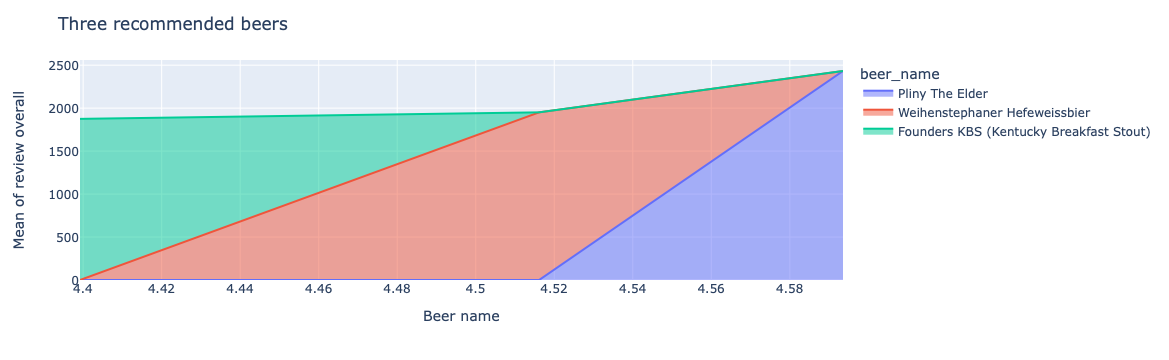

In [46]:
fig = px.area(top_beers, x="mean", y="count", 
              color="beer_name")
fig.update_layout(title='Three recommended beers',
                  xaxis=dict(title='Beer name'),
                  yaxis=dict(title='Mean of review overall '))
fig.show()

### Question 3. 

### What are the factors that impacts the quality of beer the most ?

We have four main factors influencing the assessment of beer quality: **aroma, taste, appearance, palette, abv**. We can check how these factors correlate with the target **review_overall**. According to the methodology on this page https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/ some weights are added to each factor, and the average is calculated weighted. 

We can perform a simple **regression** and check the influence of given factors on the target.

### Correlations

The correlation is possible only for numerical variable. A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other.

In [47]:
corr = df.corr()
corr

review_overall  review_aroma  review_appearance  \
review_overall           1.000000      0.615908           0.501318   
review_aroma             0.615908      1.000000           0.560407   
review_appearance        0.501318      0.560407           1.000000   
review_palate            0.701787      0.616345           0.566086   
review_taste             0.789969      0.716340           0.546345   
beer_abv                 0.142239      0.331356           0.265012   

                   review_palate  review_taste  beer_abv  
review_overall          0.701787      0.789969  0.142239  
review_aroma            0.616345      0.716340  0.331356  
review_appearance       0.566086      0.546345  0.265012  
review_palate           1.000000      0.733768  0.286733  
review_taste            0.733768      1.000000  0.291110  
beer_abv                0.286733      0.291110  1.000000

Text(0.5, 1.0, 'Correlation between atributes')

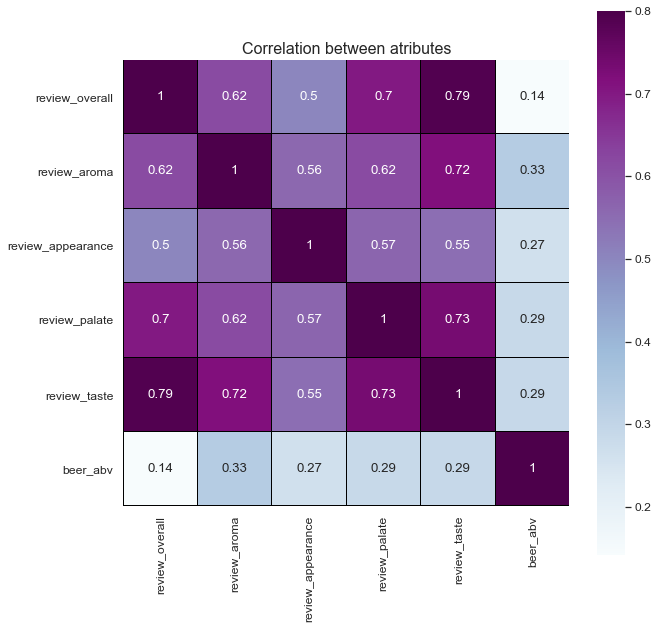

In [48]:
sns.set(font_scale=1.1)
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap="BuPu", linecolor="black")
plt.title('Correlation between atributes', fontsize=16)

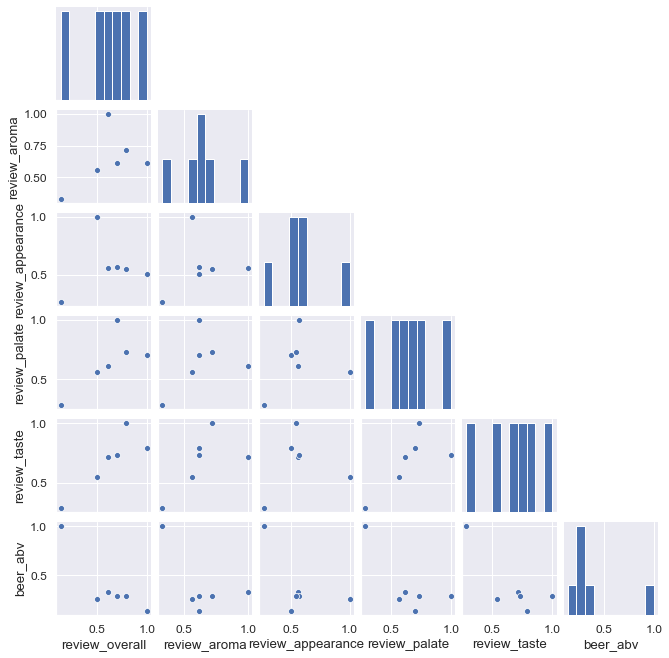

In [49]:
sns.pairplot(corr, corner = True, height=1.5)

## Train/Test Split

In [50]:
X = df[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']] 
# target
y = df['review_overall']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 67)

In [52]:
model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6739918542734691

In [53]:
model.coef_ 

array([ 0.07711662,  0.04825772,  0.26992201,  0.55567264, -0.04080029])

In [54]:
model.intercept_

0.5075761005423103

In [55]:
pred = model.predict(X_test)
pred

array([4.30144442, 3.45455995, 3.60401592, ..., 4.49352583, 3.70316469,
       3.75025573])

**Metrics for regression** involve calculating an error score to summarize the predictive skill of a model.
There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

- Mean Squared Error (MSE).
- Root Mean Squared Error (RMSE).
- Mean Absolute Error (MAE)

In [56]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 0.17


### Plotting feature importances

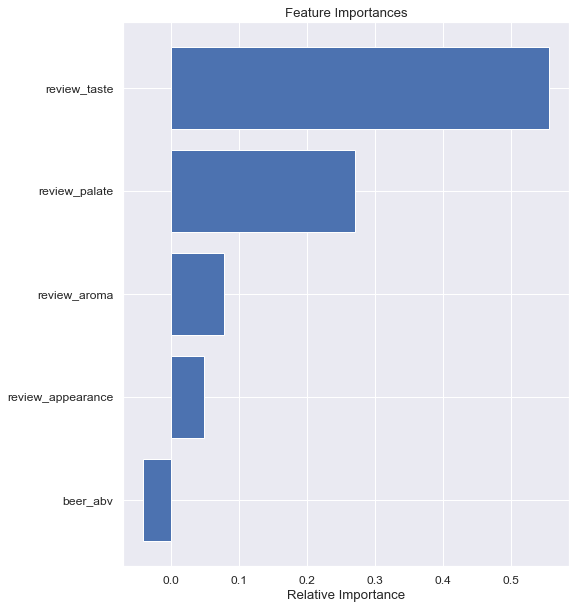

In [57]:
features = X.columns
importances = model.coef_
indices = np.argsort(importances)

plt.figure(figsize=(8,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### Ouestion 4. 

### I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

In [58]:
df_style = df[['beer_style', 'review_aroma','review_appearance', 'review_overall']]
df_style

beer_style  review_aroma  review_appearance  \
0                            Hefeweizen           2.0                2.5   
1                    English Strong Ale           2.5                3.0   
2                Foreign / Export Stout           2.5                3.0   
3                       German Pilsener           3.0                3.5   
4        American Double / Imperial IPA           4.5                4.0   
...                                 ...           ...                ...   
1586609                     Pumpkin Ale           4.0                3.5   
1586610                     Pumpkin Ale           5.0                2.5   
1586611                     Pumpkin Ale           3.5                3.0   
1586612                     Pumpkin Ale           4.5                4.5   
1586613                     Pumpkin Ale           4.5                4.5   

         review_overall  
0                   1.5  
1                   3.0  
2                   3.0  
3                   3.0  
4                   4.0  
...                 ...  
1586609             5.0  
1586610             4.0  
1586611             4.5  
1586612             4.0  
1586613             5.0  

[1571311 rows x 4 columns]

In [59]:
df_style = df_style.groupby(['beer_style']).agg(['mean','count'])
df_style.head()

review_aroma        review_appearance         \
                                   mean  count              mean  count   
beer_style                                                                
Altbier                        3.624415   7688          3.809573   7688   
American Adjunct Lager         2.478734  30306          2.787633  30306   
American Amber / Red Ale       3.625306  45281          3.809081  45281   
American Amber / Red Lager     3.212857   9147          3.528315   9147   
American Barleywine            4.018589  26494          4.035348  26494   

                           review_overall         
                                     mean  count  
beer_style                                        
Altbier                          3.823491   7688  
American Adjunct Lager           2.998020  30306  
American Amber / Red Ale         3.778461  45281  
American Amber / Red Lager       3.560293   9147  
American Barleywine              3.895674  26494

In [60]:
df_style['aroma_appearance_mean'] = (df_style[('review_appearance', 'mean')] + df_style[('review_aroma', 'mean')]) / 2
df_style

review_aroma        review_appearance         \
                                   mean  count              mean  count   
beer_style                                                                
Altbier                        3.624415   7688          3.809573   7688   
American Adjunct Lager         2.478734  30306          2.787633  30306   
American Amber / Red Ale       3.625306  45281          3.809081  45281   
American Amber / Red Lager     3.212857   9147          3.528315   9147   
American Barleywine            4.018589  26494          4.035348  26494   
...                                 ...    ...               ...    ...   
Vienna Lager                   3.432544   8828          3.696874   8828   
Weizenbock                     4.043739   9351          4.008876   9351   
Wheatwine                      3.968217   3697          3.906005   3697   
Winter Warmer                  3.706682  20517          3.844470  20517   
Witbier                        3.640339  29892          3.686036  29892   

                           review_overall        aroma_appearance_mean  
                                     mean  count                        
beer_style                                                              
Altbier                          3.823491   7688              3.716994  
American Adjunct Lager           2.998020  30306              2.633183  
American Amber / Red Ale         3.778461  45281              3.717194  
American Amber / Red Lager       3.560293   9147              3.370586  
American Barleywine              3.895674  26494              4.026968  
...                                   ...    ...                   ...  
Vienna Lager                     3.759742   8828              3.564709  
Weizenbock                       4.007165   9351              4.026307  
Wheatwine                        3.814850   3697              3.937111  
Winter Warmer                    3.703563  20517              3.775576  
Witbier                          3.775759  29892              3.663187  

[104 rows x 7 columns]

In [61]:
df_style = df_style.sort_values([('aroma_appearance_mean'),('review_overall',  'count')], ascending=False).head(10)
df_style

review_aroma        review_appearance         \
                                         mean  count              mean  count   
beer_style                                                                      
American Double / Imperial Stout     4.158018  50143          4.162037  50143   
Russian Imperial Stout               4.075259  53542          4.208547  53542   
Quadrupel (Quad)                     4.132520  17986          4.117730  17986   
American Double / Imperial IPA       4.095161  84667          4.077498  84667   
Gueuze                               4.116722   5980          4.034699   5980   
American Wild Ale                    4.124901  17638          4.003770  17638   
Eisbock                              4.156545   2651          3.964730   2651   
American Barleywine                  4.018589  26494          4.035348  26494   
Belgian IPA                          3.978571  12343          4.074860  12343   
Weizenbock                           4.043739   9351          4.008876   9351   

                                 review_overall        aroma_appearance_mean  
                                           mean  count                        
beer_style                                                                    
American Double / Imperial Stout       4.027451  50143              4.160027  
Russian Imperial Stout                 4.021049  53542              4.141903  
Quadrupel (Quad)                       4.071361  17986              4.125125  
American Double / Imperial IPA         3.995098  84667              4.086329  
Gueuze                                 4.085619   5980              4.075711  
American Wild Ale                      4.091450  17638              4.064336  
Eisbock                                3.976047   2651              4.060637  
American Barleywine                    3.895674  26494              4.026968  
Belgian IPA                            3.957263  12343              4.026716  
Weizenbock                             4.007165   9351              4.026307

In [62]:
df_style.reset_index(inplace=True)
df_style

beer_style review_aroma        review_appearance  \
                                            mean  count              mean   
0  American Double / Imperial Stout     4.158018  50143          4.162037   
1            Russian Imperial Stout     4.075259  53542          4.208547   
2                  Quadrupel (Quad)     4.132520  17986          4.117730   
3    American Double / Imperial IPA     4.095161  84667          4.077498   
4                            Gueuze     4.116722   5980          4.034699   
5                 American Wild Ale     4.124901  17638          4.003770   
6                           Eisbock     4.156545   2651          3.964730   
7               American Barleywine     4.018589  26494          4.035348   
8                       Belgian IPA     3.978571  12343          4.074860   
9                        Weizenbock     4.043739   9351          4.008876   

         review_overall        aroma_appearance_mean  
   count           mean  count                        
0  50143       4.027451  50143              4.160027  
1  53542       4.021049  53542              4.141903  
2  17986       4.071361  17986              4.125125  
3  84667       3.995098  84667              4.086329  
4   5980       4.085619   5980              4.075711  
5  17638       4.091450  17638              4.064336  
6   2651       3.976047   2651              4.060637  
7  26494       3.895674  26494              4.026968  
8  12343       3.957263  12343              4.026716  
9   9351       4.007165   9351              4.026307

In [63]:
aroma = df_style['aroma_appearance_mean'].head()
aroma.tolist

style = df_style['beer_style'].head()
style.tolist

<bound method IndexOpsMixin.tolist of 0    American Double / Imperial Stout
1              Russian Imperial Stout
2                    Quadrupel (Quad)
3      American Double / Imperial IPA
4                              Gueuze
Name: beer_style, dtype: object>

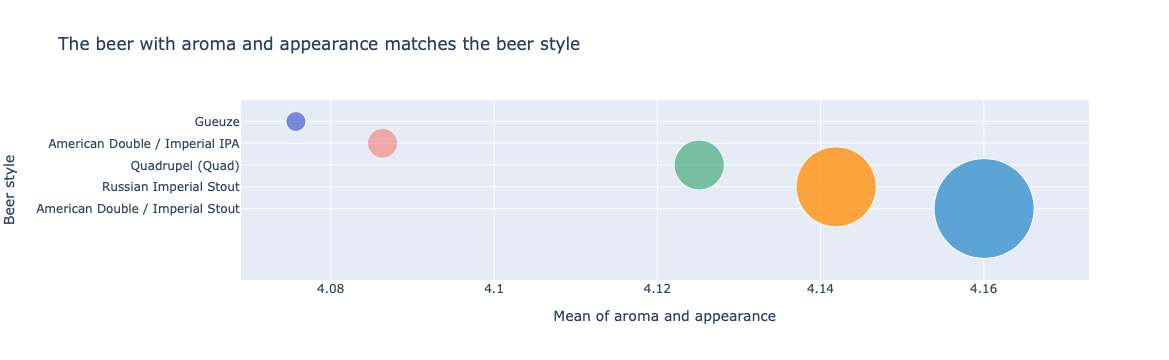

In [64]:
fig = go.Figure(data=[go.Scatter(x=aroma,y=style, 
                      mode='markers',
                      marker=dict(
                          color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
                                 'rgb(44, 160, 101)', 'rgb(255, 65, 54)','rgb(93, 112, 214)'],
                          opacity=[1, 0.8, 0.6, 0.4, 0.8],
                          size=[100, 80, 50, 30, 20]))
])
fig.update_layout(title='The beer with aroma and appearance matches the beer style',
                 xaxis=dict(title='Mean of aroma and appearance'
                           ),
                  yaxis=dict(title="Beer style"))
fig.show()